# XGBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_n = pd.read_csv('/content/drive/MyDrive/22-2_인빅_프로젝트/Project_1+신용점수예측/modeling/dt_1hot_proc.csv', index_col = 0)
test_n = pd.read_csv('/content/drive/MyDrive/22-2_인빅_프로젝트/Project_1+신용점수예측/modeling/test_1hot_proc.csv', index_col = 0)

In [4]:
train = train_n.drop('credit', axis=1)
col_Y = train_n['credit']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train, col_Y, test_size=0.2, shuffle=True, stratify=col_Y, random_state=34)

In [ ]:
# params
lr = 0.15
n_estimator = 10000
gamma = 0.08

In [ ]:
import xgboost as xgb

In [ ]:
model_tree = xgb.XGBRegressor(booster='gbtree', eval_metric='mae', learning_rate=lr, n_estimator=n_estimator, gamma=gamma)
model_linear = xgb.XGBRegressor(booster='gblinear', eval_metric='mae', learning_rate=lr, n_estimator=n_estimator, gamma=gamma)

In [ ]:
model_tree.fit(train, col_Y)
model_linear.fit(train, col_Y)

[14:52:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(booster='gblinear', eval_metric='mae', gamma=0.08,
             learning_rate=0.15, n_estimator=10000)

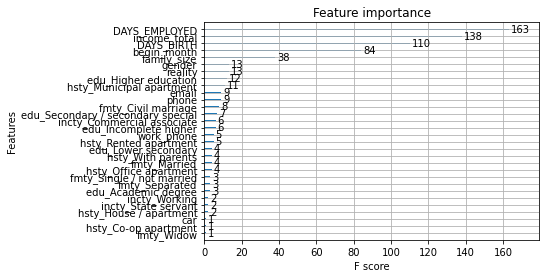

In [ ]:
xgb.plot_importance(model_tree)

In [ ]:
tree_pred = model_tree.predict(train)
linear_pred = model_linear.predict(train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_tree = mean_absolute_error(tree_pred, col_Y)
mae_linear = mean_absolute_error(linear_pred, col_Y)

In [ ]:
print(f'tree boosting MAE : {mae_tree}')
print(f'linear boosting MAE : {mae_linear}')

tree boosting MAE : 0.5590567052080953
linear boosting MAE : 0.599747327205224


In [ ]:
print(sum(tree_pred.round(0)==col_Y)/len(tree_pred))
print(sum(linear_pred.round(0)==col_Y)/len(tree_pred))

0.6529132081553711
0.49661535981948585


In [ ]:
tree_pred

array([1.4234998, 1.3920102, 1.6147249, ..., 1.4461762, 1.6336973,
       1.6153508], dtype=float32)

In [ ]:
linear_pred

array([1.337245 , 1.3257929, 1.5924541, ..., 1.4312251, 1.6052628,
       1.4097267], dtype=float32)